# Предобработка данных


**Слайд 2**  


Конвейер (пайплайн) машинного обучения:  
- **Этап обучения**  
- **Этап предсказания**

Этапы процесса:
- Предварительная обработка данных  
- Выделение признаков  
- Алгоритм обучения  
- Оценка точности  
- Постобработка результатов

А.Г. Трофимов  Применение МНС  2 / 45

---



**Слайд 3**  


Принцип GIGO (Garbage In, Garbage Out) – «Мусор на входе – мусор на выходе»  

В реальных задачах наборы данных зачастую содержат шум, противоречивы и неструктурированы.

Предварительная обработка данных – пожалуй, одна из самых скучных и трудоёмких частей построения нейронной сети.

Виды предварительной обработки данных:
- Очистка данных  
- Интеграция данных  
- Сокращение данных  
- Преобразование данных

А.Г. Трофимов  Применение МНС  3 / 45

---



**Слайд 4**  

**Очистка данных** – процесс обнаружения и корректировки (или удаления) повреждённых или неточных данных из набора, то есть выявление неполных, неправильных, ошибочных или неактуальных частей данных с последующей заменой, модификацией или удалением «грязных» данных.

Этапы очистки данных:
1. **Этап идентификации**  
   Цель – выявить и прояснить истинную природу проблемных точек данных, закономерностей и статистики.
2. **Этап обработки**  
   После выявления ошибок, отсутствующих значений и установления истинных (крайних или нормальных) значений исследователь должен принять решение, как поступить с проблемными наблюдениями.

А.Г. Трофимов  Применение МНС  4 / 45

---



**Слайд 5**  

**Очистка данных** занимается:
- Отсутствующими значениями  
- Дублированием данных  
- Выбросами  
- Несоответствиями (противоречивость данных)

Причины «грязных» данных:
- Ошибки при вводе данных (человеческие ошибки)  
- Ошибки измерения (ошибки приборов)  
- Ошибки обработки данных (неправильная манипуляция или непреднамеренные изменения набора)  
- Намеренные искажения (ошибки для сокрытия данных или усложнения обработки)  
- Ошибки выборки (неверное извлечение или некорректное объединение данных из различных источников)

А.Г. Трофимов  Применение МНС  5 / 45

---



**Слайд 6**  

**Подходы к обработке отсутствующих значений**

- Замена отсутствующих значений на *значение по умолчанию*  
- Ручное заполнение отсутствующих значений  
- Ручная замена NaN на предполагаемое значение  
- Удаление обучающих примеров, содержащих отсутствующие значения  
  – приводит к потере данных, которые могут быть ценными (даже если неполными)  
- Удаление признаков, содержащих отсутствующие значения  
  – может привести к огромной потере информации  
- Импутация отсутствующих значений  
  – является наилучшим подходом к обработке отсутствующих данных

Определение:  
Импутация (заполнение, замена, вменение) данных – процесс замены отсутствующих данных на подставленные значения.

А.Г. Трофимов  Применение МНС  6 / 45

---



**Слайд 7**  


**Стратегии импутации данных**

*Однократная импутация*  
Отсутствующее значение заменяется на одно значение.

*Множественная импутация*  
Отсутствующие значения импретируются m раз, что приводит к m различным полным наборам данных. Итоговый результат получается путём объединения этих m наборов.

Стратегии однократной импутации:
- Замена средним (медианой, модой)  
  – Замена отсутствующего значения на среднее (или медианное, модальное) значение признака.
- Метод ближайших соседей (KNN)  
  – Отсутствующее значение заполняется средним значением признака по ближайшим соседям примера с пропуском.
- Регрессия  
  – Замена на значение, оцененное с помощью регрессионной модели.

А.Г. Трофимов  Применение МНС  7 / 45

---


## Импутация пропусков: стратегии однократной и множественной импутации

In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


 ### 1. Создадим данные с пропусками

In [283]:
# np.random.seed(42)
data = {
    'feature_1': np.random.normal(50, 10, 100), # + np.linspace(0, 10, 100),
    'feature_2': np.random.normal(30, 5, 100) # + np.linspace(0, 10, 100)
}

df = pd.DataFrame(data)

df_orig = df.copy()
# Добавляем пропуски случайным образом
missing_mask = np.random.rand(100) < 0.1
df.loc[missing_mask, 'feature_1'] = np.nan

df.head(10)


,feature_1,feature_2
0,74.722795,34.235395
1,45.041338,36.112505
2,60.235215,36.072546
3,39.063711,29.552387
4,53.721314,31.813278
5,54.788722,36.493693
6,49.758230,28.483458
7,44.289953,31.898631
8,47.366781,28.365596
9,45.967105,27.245259


In [284]:
missing_mask_inv = ~missing_mask

In [285]:
missing_mask.sum(), missing_mask_inv.sum()

(np.int64(10), np.int64(90))

In [286]:
# вывод данных с пропусками
df.loc[missing_mask]

,feature_1,feature_2
19,NaN,32.262674
38,NaN,27.755396
46,NaN,26.141858
47,NaN,31.483142
68,NaN,22.236365
69,NaN,28.482320
75,NaN,37.669891
77,NaN,26.585038
92,NaN,29.055517
99,NaN,26.912767


### 2. Визуализируем распределение исходных данных (с пропусками)

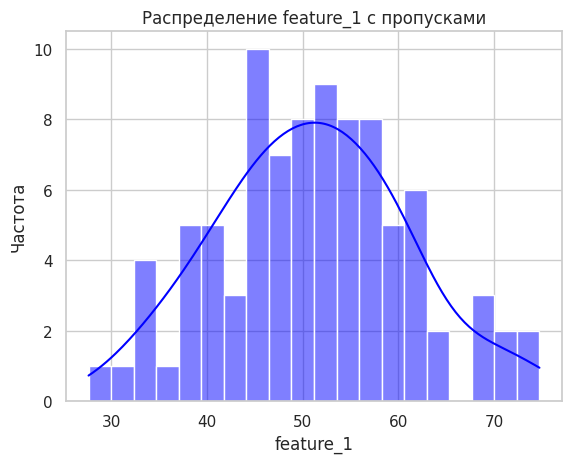

In [287]:
sns.histplot(df['feature_1'], bins=20, kde=True, color='blue')
# sns.histplot(df['feature_2'], bins=20, kde=True, color='red')
plt.title('Распределение feature_1 с пропусками')
plt.xlabel('feature_1')
plt.ylabel('Частота')
plt.show()


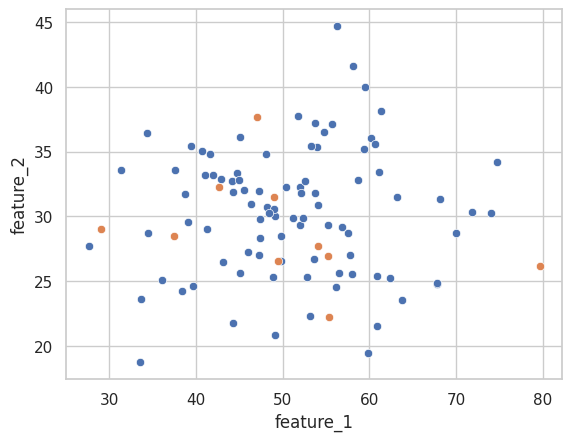

In [288]:
sns.scatterplot(data=df, x='feature_1', y='feature_2')
sns.scatterplot(data=df_orig[missing_mask], x='feature_1', y='feature_2')

plt.show()

### 3. Однократная импутация

In [289]:
# Замена средним
mean_imputer = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean['feature_1'] = mean_imputer.fit_transform(df[['feature_1']])

# Замена медианой
median_imputer = SimpleImputer(strategy='median')
df_median = df.copy()
df_median['feature_1'] = median_imputer.fit_transform(df[['feature_1']])

# Замена модой
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode = df.copy()
df_mode['feature_1'] = mode_imputer.fit_transform(df[['feature_1']])

# Замена методом KNN
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn[['feature_1', 'feature_2']] = knn_imputer.fit_transform(df[['feature_1', 'feature_2']])


In [290]:
df.describe()

,feature_1,feature_2
count,90.000000,100.000000
mean,50.976803,30.196490
std,9.902917,4.906136
min,27.655736,18.754521
25%,44.394219,26.579349
50%,51.469040,30.268818
75%,57.710935,33.251516
max,74.722795,44.688764


<Axes: xlabel='feature_1', ylabel='Proportion'>

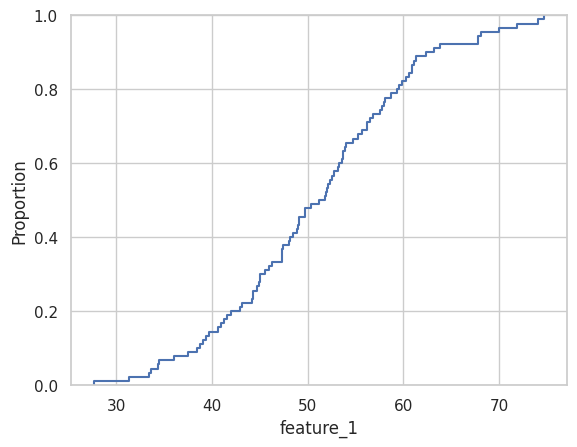

In [291]:
# cdf для визуализации df
sns.ecdfplot(df['feature_1'], legend=False)

In [292]:
# конкатенация столбцов датафреймов
df_concat = pd.concat([df_orig, df, df_mean, df_median, df_mode, df_knn], axis=1)

df_concat.loc[missing_mask]


,feature_1,feature_2,feature_1,feature_2,feature_1,feature_2,feature_1,feature_2,feature_1,feature_2,feature_1,feature_2
19,42.681229,32.262674,NaN,32.262674,50.976803,32.262674,51.46904,32.262674,27.655736,32.262674,47.907651,32.262674
38,54.013436,27.755396,NaN,27.755396,50.976803,27.755396,51.46904,27.755396,27.655736,27.755396,43.611198,27.755396
46,79.650104,26.141858,NaN,26.141858,50.976803,26.141858,51.46904,26.141858,27.655736,26.141858,50.495493,26.141858
47,49.033711,31.483142,NaN,31.483142,50.976803,31.483142,51.46904,31.483142,27.655736,31.483142,55.170315,31.483142
68,55.328599,22.236365,NaN,22.236365,50.976803,22.236365,51.46904,22.236365,27.655736,22.236365,54.254919,22.236365
69,37.461918,28.482320,NaN,28.482320,50.976803,28.482320,51.46904,28.482320,27.655736,28.482320,51.823331,28.482320
75,47.085100,37.669891,NaN,37.669891,50.976803,37.669891,51.46904,37.669891,27.655736,37.669891,55.452057,37.669891
77,49.495771,26.585038,NaN,26.585038,50.976803,26.585038,51.46904,26.585038,27.655736,26.585038,50.315085,26.585038
92,29.048425,29.055517,NaN,29.055517,50.976803,29.055517,51.46904,29.055517,27.655736,29.055517,52.557502,29.055517
99,55.206644,26.912767,NaN,26.912767,50.976803,26.912767,51.46904,26.912767,27.655736,26.912767,50.879726,26.912767


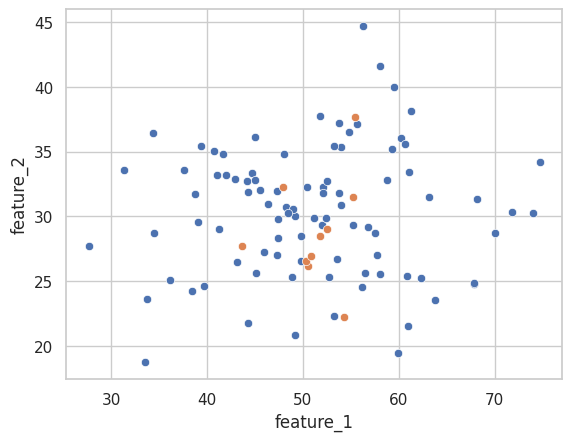

In [293]:
sns.scatterplot(data=df, x='feature_1', y='feature_2')
sns.scatterplot(data=df_knn[missing_mask], x='feature_1', y='feature_2')

plt.show()

### 4. Визуализируем разные стратегии однократной импутации

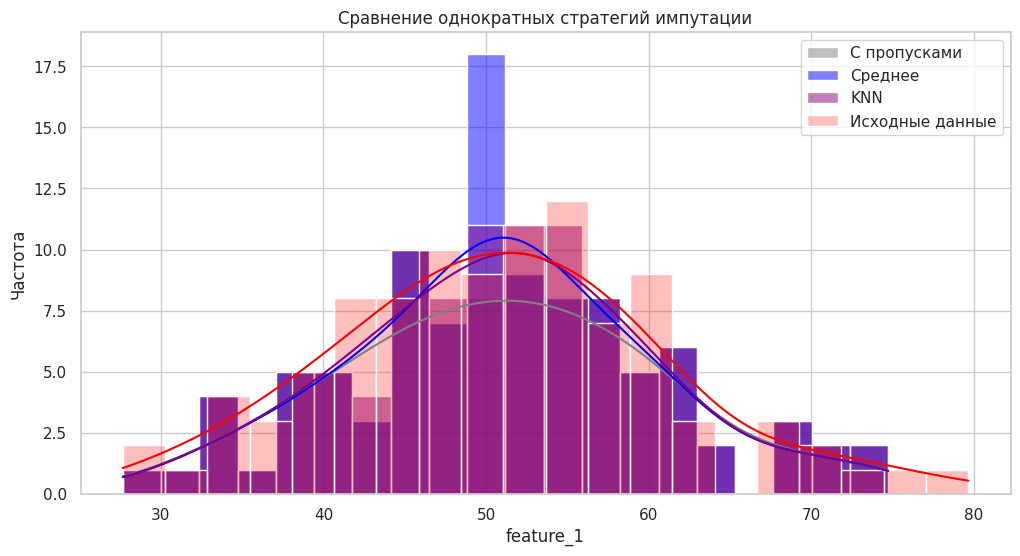

In [294]:
plt.figure(figsize=(12, 6))
sns.histplot(df['feature_1'], bins=20, kde=True, color='gray', label='С пропусками')
sns.histplot(df_mean['feature_1'], bins=20, kde=True, color='blue', label='Среднее', alpha=0.5)
# sns.histplot(df_median['feature_1'], bins=20, kde=True, color='green', label='Медиана', alpha=0.5)
# sns.histplot(df_mode['feature_1'], bins=20, kde=True, color='orange', label='Мода', alpha=0.5)
sns.histplot(df_knn['feature_1'], bins=20, kde=True, color='purple', label='KNN', alpha=0.5)
sns.histplot(df_orig['feature_1'], bins=20, kde=True, color='red', label='Исходные данные', alpha=0.25)
plt.title('Сравнение однократных стратегий импутации')
plt.xlabel('feature_1')
plt.ylabel('Частота')
plt.legend()
plt.show()


### 5. Импутация регрессией

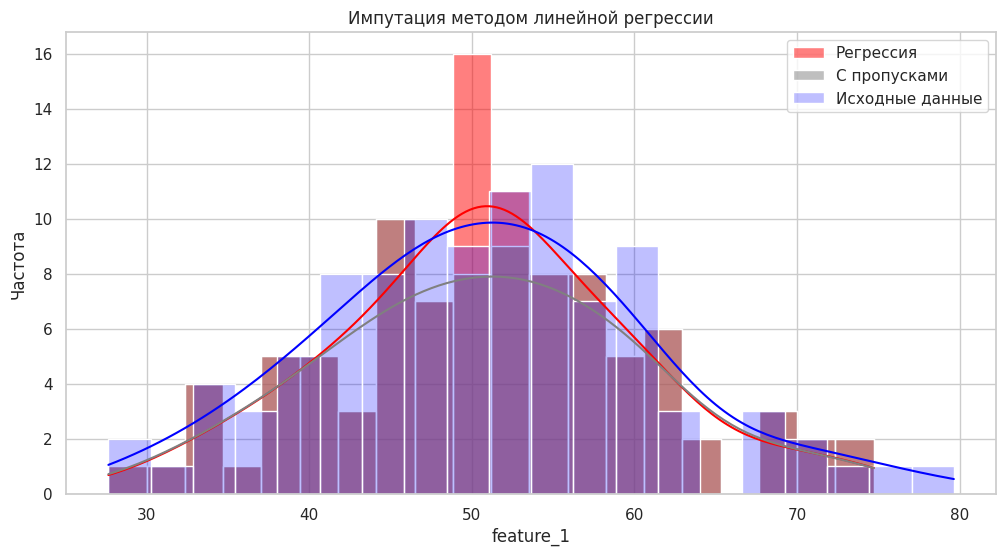

In [295]:
# готовим обучающую выборку, только непустые значения
df_reg = df.dropna()

# Модель линейной регрессии
model = LinearRegression()
model.fit(df_reg[['feature_2']], df_reg['feature_1'])

# Прогнозируем пропуски
df_lr = df.copy()
mask_missing = df_lr['feature_1'].isnull()
df_lr.loc[mask_missing, 'feature_1'] = model.predict(df_lr.loc[mask_missing, ['feature_2']])

# Визуализация
plt.figure(figsize=(12, 6))
sns.histplot(df_lr['feature_1'], bins=20, kde=True, color='red', label='Регрессия', alpha=0.5)
sns.histplot(df['feature_1'], bins=20, kde=True, color='gray', label='С пропусками')
sns.histplot(df_orig['feature_1'], bins=20, kde=True, color='blue', label='Исходные данные', alpha=0.25)
plt.title('Импутация методом линейной регрессии')
plt.xlabel('feature_1')
plt.ylabel('Частота')
plt.legend()
plt.show()


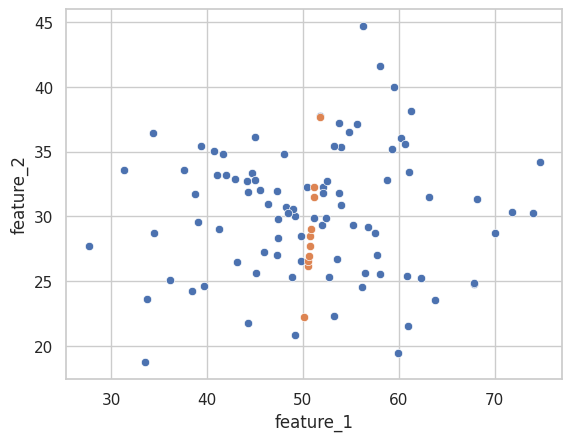

In [296]:
sns.scatterplot(data=df, x='feature_1', y='feature_2')
sns.scatterplot(data=df_lr[missing_mask], x='feature_1', y='feature_2')

plt.show()

### 6. Множественная итеративная импутация (IterativeImputer)

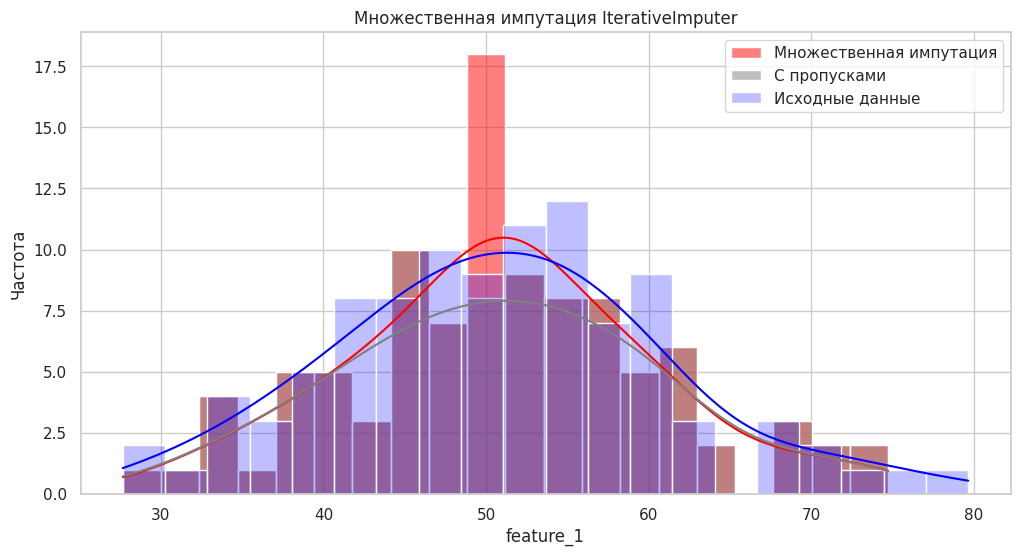

In [297]:
# Множественная импутация
iterative_imputer = IterativeImputer(random_state=42, max_iter=20)
df_iter = df.copy()
df_iter[['feature_1', 'feature_2']] = iterative_imputer.fit_transform(df[['feature_1', 'feature_2']])

# Визуализация
plt.figure(figsize=(12, 6))
sns.histplot(df_iter['feature_1'], bins=20, kde=True, color='red', label='Множественная импутация', alpha=0.5)
sns.histplot(df['feature_1'], bins=20, kde=True, color='gray', label='С пропусками')
sns.histplot(df_orig['feature_1'], bins=20, kde=True, color='blue', label='Исходные данные', alpha=0.25)
plt.title('Множественная импутация IterativeImputer')
plt.xlabel('feature_1')
plt.ylabel('Частота')
plt.legend()
plt.show()


### итог

 - **Среднее, медиана, мода** — простые способы заполнения, могут смещать распределение.

 - **KNN** — использует близкие по другим признакам примеры.

 - **Регрессия** — учитывает линейную зависимость от других переменных.

 - **Множественная импутация (IterativeImputer)** — несколько итераций замены на основе модели, даёт более реалистичные оценки.


**Слайд 9**  


Определение:  
Выброс – это наблюдение, которое настолько сильно отличается от остальных, что возникает подозрение, что оно получено другим механизмом.

А.Г. Трофимов  Применение МНС  9 / 45

---



**Слайд 10**  

**Подходы к обнаружению выбросов**

*Методы, основанные на модели*  

– Идея: определить вероятностную модель данных. Выбросы – это точки, которые плохо подгоняются под модель. 

Методы: статистические тесты, подгонка эллиптического конверт (для гауссовской модели), алгоритм «изолирующий лес», метод главных компонент (PCA) и др.

---

*Методы, основанные на близости*  

– Идея: оценить пространственную близость каждого объекта в пространстве данных. Если близость объекта существенно отличается от остальных, он считается выбросом.  

Методы: кластеризация, анализ ближайших соседей, локальный фактор выброса (LOF) и др.

---

*Методы, основанные на углах*  

– Идея: исследовать распределение парных углов между данной точкой и всеми остальными точками. Выбросы – это точки, спектр углов для которых характеризуется низкой изменчивостью.  

Методы: метод обнаружения выбросов на основе углов (ABOD) и др.

---

А.Г. Трофимов  Применение МНС  10 / 45

---



**Слайд 11**  


**Методы, основанные на близости**

Подходы, основанные на анализе пространственной близости выборки:
- **Обнаружение выбросов по расстоянию**  
  Объект o считается выбросом, если в его окрестности недостаточно других точек.
- **Обнаружение выбросов по плотности**  
  Объект o считается выбросом, если его плотность значительно меньше, чем у его соседей.

А.Г. Трофимов  Применение МНС  11 / 45

---


## Близость, плотность 

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# генерируем данные с выбросами
np.random.seed(42)
X = np.random.randn(100, 2) * 2
X = np.vstack([X, [8, 8], [9, 9], [7, 7]])  # выбросы

# k ближайших соседей
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, inds = nbrs.kneighbors(X)


In [299]:
distances.shape

(103, 5)

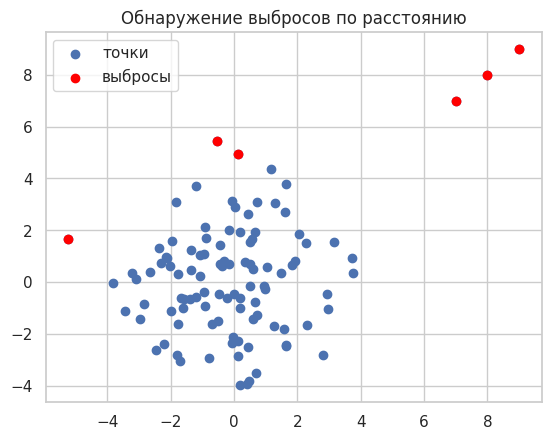

In [300]:
# cреднее расстояние до k соседей
mean_dist = distances.mean(axis=1)

# порог для выбросов
threshold = np.percentile(mean_dist, 95)

outliers = X[mean_dist > threshold]

# Визуализация
plt.scatter(X[:, 0], X[:, 1], label='точки')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='выбросы')
plt.legend()
plt.title('Обнаружение выбросов по расстоянию')
plt.show()


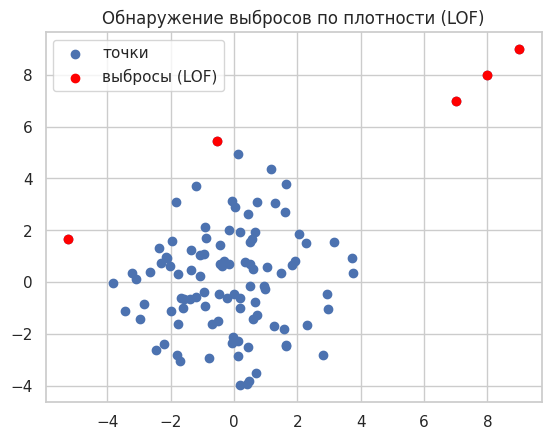

In [301]:
from sklearn.neighbors import LocalOutlierFactor

# LOF-модель
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# Выбросы имеют метку -1
outliers = X[y_pred == -1]

# Визуализация
plt.scatter(X[:, 0], X[:, 1], label='точки')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='выбросы (LOF)')
plt.legend()
plt.title('Обнаружение выбросов по плотности (LOF)')
plt.show()


**Слайд 12**  

**Иллюстрация обнаружения выбросов**

- Методы, основанные на близости, хорошо обнаруживают выбросы, аналогичные точке A,  
- тогда как методы, основанные на модели, лучше обнаруживают выбросы, аналогичные точке B.

А.Г. Трофимов  Применение МНС  12 / 45

---



**Слайд 13**  


**Гиперсфера в высокоразмерном пространстве**
Для стандартного одномерного нормального распределения $U \sim \mathcal{N}(0, 1)$:
$$
P\left( \|U\| < 1.6 \right) = 0.9
$$
90\% данных лежат в интервале $[-1.6, 1.6]$.

Для стандартного двумерного нормального распределения $U \sim \mathcal{N}^2(0, I_2)$:
$$
P\left( \|U\| < 1.6 \right) = P\left( \sqrt{U_1^2 + U_2^2} < 1.6 \right) 
= P\left( \chi^2(2) < 2.56 \right) = 0.72
$$
72\% данных находятся в окружности радиуса 1.6.

Для стандартного $M$-мерного нормального распределения:
$$
P\left( \|U\| < 1.6 \right) = P\left( \chi^2(M) < 2.56 \right)
$$
При росте $M$ эта вероятность стремится к нулю для любого фиксированного радиуса.

А.Г. Трофимов  Применение МНС  13 / 45

---



**Слайд 14**  

**Феномен пустот в данных**

По мере увеличения размерности M гиперсфера с фиксированным радиусом занимает ничтожно малый объём. Выборка становится очень разреженной.


А.Г. Трофимов  Применение МНС  14 / 45

---



**Слайд 15**  


**Пространственная близость в высокоразмерном пространстве**

В высокоразмерном пространстве относительный контраст между ближайшим и самым дальним соседями становится очень слабым для большинства распределений данных:

$$
\lim_{M \to \infty} \frac{\text{dist}_{\text{max}} - \text{dist}_{\text{min}}}{\text{dist}_{\text{min}}} = 0
$$

Все объекты оказываются на примерно одинаковом расстоянии друг от друга. Данные очень разрежены, почти все точки оказываются выбросами, а понятие «пространственного соседа» утрачивает смысл.

**Решения:**
- Использовать подходы, учитывающие высокую размерность (например, на основе углов).  
- Идентифицировать выбросы в проекциях (подпространствах) исходного признакового пространства.

А.Г. Трофимов  Применение МНС  15 / 45

---


**Слайд 16**  

**Подходы, основанные на углах**

- Спектр углов между парой точек для выброса имеет низкую изменчивость,  
- в то время как для пограничных точек кластера изменчивость углов выше, а для внутренних точек – очень высокая.

А.Г. Трофимов  Применение МНС  16 / 45

---


## Углы 

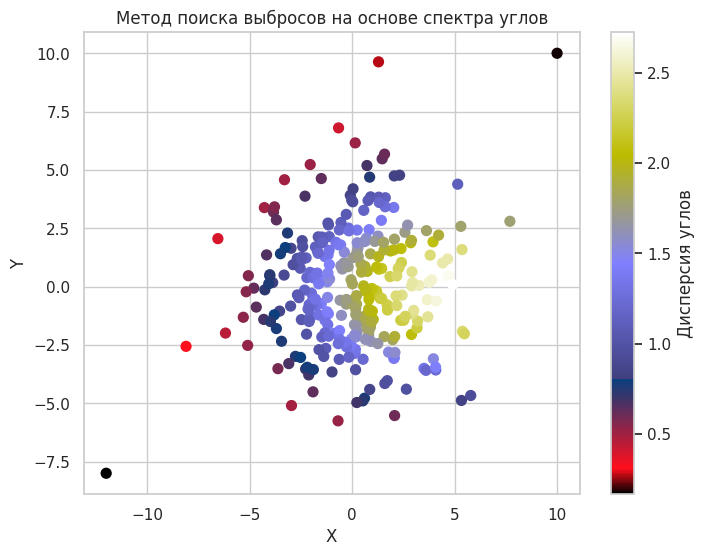

In [302]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# генерация основного облака точек
n_points = 300
X = np.random.randn(n_points, 2) * 2.5

# выбросы
outliers = np.array([[10, 10], [-12, -8]])
X = np.vstack([X, outliers])

# функция для вычисления углов между векторами от центра к остальным точкам
def angle_variance(center, points):
    vectors = points - center
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    unit_vectors = vectors / norms
    angles = np.arctan2(unit_vectors[:, 1], unit_vectors[:, 0]) + np.pi
    return np.std(angles)
    # return np.var(angles)
    # return np.ptp(angles)
    # разность перцентилей и т.д.

# вычислим дисперсию углов для каждой точки
variances = []
for i in range(len(X)):
    other_points = np.delete(X, i, axis=0)
    var = angle_variance(X[i], other_points)
    variances.append(var)

variances = np.array(variances)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=variances, cmap='gist_stern', s=50)
plt.colorbar(scatter, label='Дисперсия углов')
plt.title('Метод поиска выбросов на основе спектра углов')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()



**Слайд 17**  

**Интеграция данных**

Определение:  
Интеграция данных – процесс аккуратного объединения данных из различных источников в один набор данных.

Если набор данных получен из единственного источника, интеграция не требуется.

Проблемы интеграции:
- Несогласованность схем данных  
- Различные источники используют разные модели данных  
- Несоответствия в самих данных: различные представления, форматы, ошибки и т.д.

Хорошая стратегия интеграции обеспечивает отсутствие ошибок, противоречий и дублирования.

А.Г. Трофимов  Применение МНС  17 / 45

---



**Слайд 18 из 45**  

**Уменьшение размерности данных (редукция)**

Определение:  
Уменьшение размерности – процесс получения сокращённого представления данных.

Преимущества редукции:
- Сокращает объём памяти, необходимый для хранения данных  
- Ускоряет процесс обучения  
- Снижает сложность модели  
- Меньшее число признаков приводит к более простой модели и уменьшает вероятность переобучения  
- Повышает релевантность модели

А.Г. Трофимов  Применение МНС  18 / 45

---



**Слайд 19**  


**Методы сокращения данных**

*Методы уменьшения размерности*  
Можно отказаться от признаков, которые являются избыточными и не оказывают существенного влияния на эффективность модели.

- **Метод главных компонент (PCA)** – ищет комбинацию признаков, которая хорошо передаёт дисперсию исходных данных.
- **Случайные проекции** – проецируют данные в пространство меньшей размерности так, чтобы расстояния между точками почти сохранялись.
- **Агломерация признаков** – применяет кластеризацию для группировки похожих по поведению признаков.

*Методы сжатия данных*  
Аналогичные данные можно заменить прототипом.
- **Кластерный анализ** – заменяет группу похожих данных на центроид кластера.

А.Г. Трофимов  Применение МНС  19 / 45

---


In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import FeatureAgglomeration, KMeans
from sklearn.preprocessing import StandardScaler

# Загрузка данных
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [304]:
iris['data'].shape

(150, 4)


### 1. Метод главных компонент (PCA)


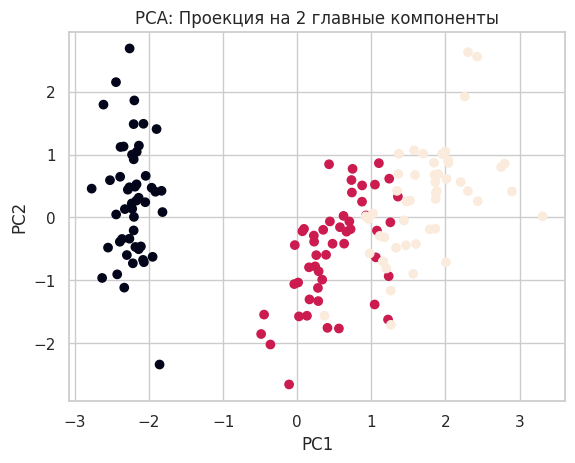

Объясненная дисперсия: [0.72962445 0.22850762]


In [305]:
# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA: Проекция на 2 главные компоненты')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print("Объясненная дисперсия:", pca.explained_variance_ratio_)


### 2. Случайные проекции


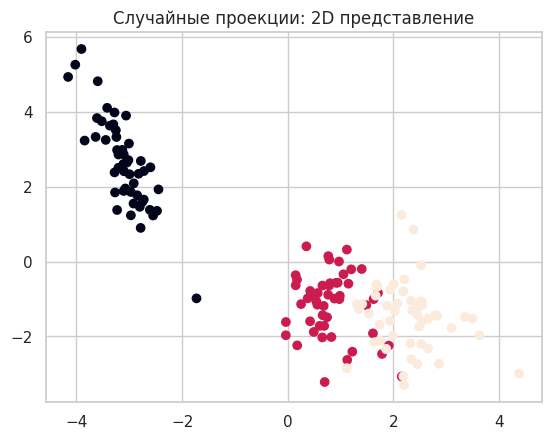

In [306]:
# Случайная проекция в 2D
rp = GaussianRandomProjection(n_components=2)
X_rp = rp.fit_transform(X_scaled)

plt.scatter(X_rp[:, 0], X_rp[:, 1], c=y)
plt.title('Случайные проекции: 2D представление')
plt.show()


### 3. Агломерация признаков


Исходная форма данных: (150, 4)
После агломерации: (150, 2)


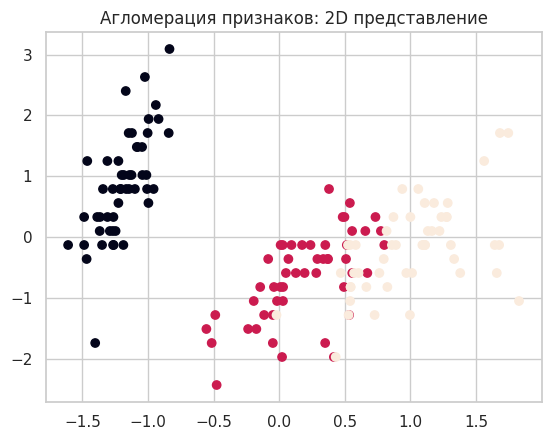

In [307]:
# Группировка признаков в 2 кластера
agglo = FeatureAgglomeration(n_clusters=2)
X_agglo = agglo.fit_transform(X_scaled)

print("Исходная форма данных:", X_scaled.shape)
print("После агломерации:", X_agglo.shape)

# Визуализация
plt.scatter(X_agglo[:, 0], X_agglo[:, 1], c=y)
plt.title('Агломерация признаков: 2D представление')
plt.show()


### 4. Кластерный анализ (K-means)

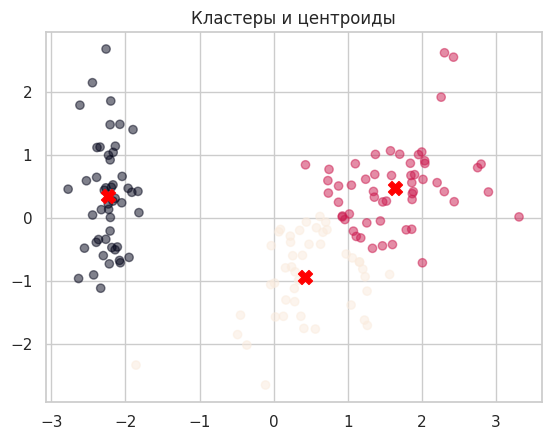

In [308]:
# кластеризация и замена на центроиды
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

# замена данных центроидами кластеров
centroids = kmeans.cluster_centers_

X_centroids = pca.transform(centroids)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, marker='o', alpha=0.5)
plt.scatter(X_centroids[:, 0], 
            X_centroids[:, 1],
            c='red', s=100, marker='X')
plt.title('Кластеры и центроиды')
plt.show()


In [273]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])


**Слайд 20 из 45**  
*Предварительная обработка данных*  
*Конструирование признаков*  
*Алгоритм обучения и оценка точности*

**Методы преобразования данных**

Преобразование данных позволяет ускорить сходимость процесса обучения.

Зависит от задачи:
- Логарифмическое преобразование, перевод в безразмерные величины и т.д.
- Нормализация входных данных

**Методы нормализации данных**

1. **Масштабирование к интервалу $[-1, 1]$:**
   \begin{equation}
   x' = 2 \cdot \frac{x - x_{\min}}{x_{\max} - x_{\min}} - 1
   \end{equation}

2. **Z-score нормализация (стандартизация):**
   \begin{equation}
   x' = \frac{x - \bar{x}}{s}
   \end{equation}
   где $\bar{x}$ — выборочное среднее, $s$ — стандартное отклонение.

3. **Вайтнинг-преобразование (Whitening):**
   \begin{equation}
   \mathbf{x}' = \mathbf{W}(\mathbf{x} - \bar{\mathbf{x}})
   \end{equation}
   где $\mathbf{W}$ — матрица отбеливания, удовлетворяющая $\mathbf{W}^T\mathbf{W} = \mathbf{\Sigma}^{-1}$, 
   а $\mathbf{\Sigma}$ — ковариационная матрица данных.

Также могут использоваться методы кодирования меток:
- One-hot кодирование

А.Г. Трофимов  Применение МНС  20 / 45

---



Проверка правильности реализации:
Z-score совпадение: True


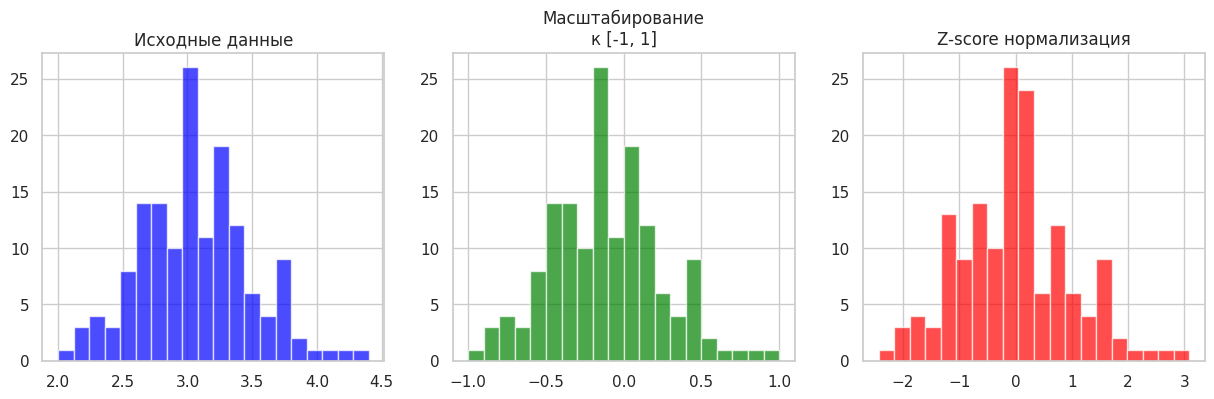

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.linalg import sqrtm


# Загрузим данные для примера
iris = load_iris()
X = iris.data[:, :2]  # Возьмем первые два признака для наглядности
x = X[:, 1]  # Работаем с одним признаком для формул

# 1. Масштабирование к интервалу [-1, 1]
def scale_to_range(x):
    x_min, x_max = x.min(), x.max()
    x_scaled = 2 * (x - x_min) / (x_max - x_min) - 1
    return x_scaled

x_scaled = scale_to_range(x)

# 2. Z-score нормализация (стандартизация)
def z_score_normalization(x):
    mean = np.mean(x)
    std = np.std(x)
    x_normalized = (x - mean) / std
    return x_normalized

x_zscore = z_score_normalization(x)

# Визуализация
plt.figure(figsize=(15, 4))

# Исходные данные
plt.subplot(1, 3, 1)
plt.hist(x, bins=20, color='blue', alpha=0.7)
plt.title('Исходные данные')

# Масштабированные данные
plt.subplot(1, 3, 2)
plt.hist(x_scaled, bins=20, color='green', alpha=0.7)
plt.title('Масштабирование\nк [-1, 1]')

# Z-score
plt.subplot(1, 3, 3)
plt.hist(x_zscore, bins=20, color='red', alpha=0.7)
plt.title('Z-score нормализация')



# Сравнение с sklearn реализациями
print("\nПроверка правильности реализации:")
scaler = StandardScaler()
x_zscore_sklearn = scaler.fit_transform(x.reshape(-1, 1)).flatten()
print(f"Z-score совпадение: {np.allclose(x_zscore, x_zscore_sklearn)}")

/tmp/ipykernel_430376/914107984.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X_2 = np.random.multivariate_normal(


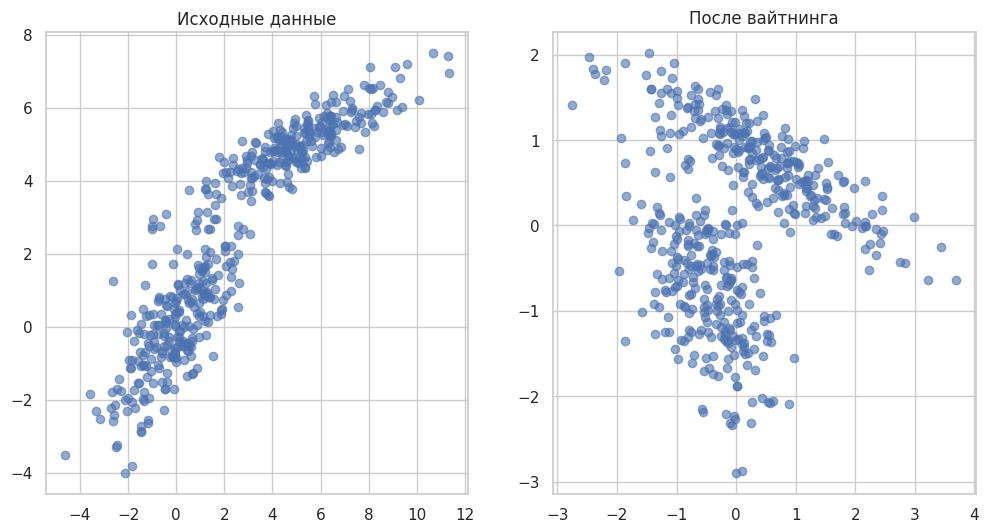

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.linalg import sqrtm

def whitening(X):
    # 1. Центрирование
    X_centered = X - np.mean(X, axis=0)
    
    # 2. Ковариационная матрица
    cov = np.cov(X_centered, rowvar=False)
    
    # 3. Вычисление матрицы преобразования
    W = sqrtm(np.linalg.inv(cov))
    
    # 4. Применение преобразования
    X_white = X_centered @ W
    
    return X_white

# Генерация коррелированных данных
np.random.seed(42)
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[2, 1.5], [1.5, 2]],
    size=250
)

X_2 = np.random.multivariate_normal(
    mean=[5, 5],
    cov=[[5, 2], [3, 1]],
    size=250
)

X = np.vstack((X, X_2))

# Применение вайтнинга
X_white = whitening(X)

# Визуализация
fdsf23213

In [334]:
X_centered = X - np.mean(X, axis=0)
np.cov(X_centered, rowvar=False), np.cov(X_white, rowvar=False)

(array([[9.69072494, 7.85110158],
        [7.85110158, 7.57172837]]),
 array([[ 1.00000e+00, -1.28154e-15],
        [-1.28154e-15,  1.00000e+00]]))